In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('/Users/saikarthik/Desktop/xai /nasdq.csv', index_col=0, parse_dates=True)

df['AvgPrice'] = df[[ 'Close']].mean(axis=1)

df['Year'] = df.index.year

yearly_avg_price = df.groupby('Year')['AvgPrice'].mean()

print(yearly_avg_price)


Year
2010     6.692125
2011     8.376375
2012     8.011529
2013    10.776237
2014    13.479044
2015    17.313799
2016    21.774487
2017    24.060366
2018    29.106692
2019    31.657083
2020    39.437168
2021    58.461204
2022    58.316274
2023    53.889394
2024    64.475612
Name: AvgPrice, dtype: float64


In [58]:
yearly_avg_price.to_csv("yearly_avg_price.csv")

Predicted average price for 2025: 74.81


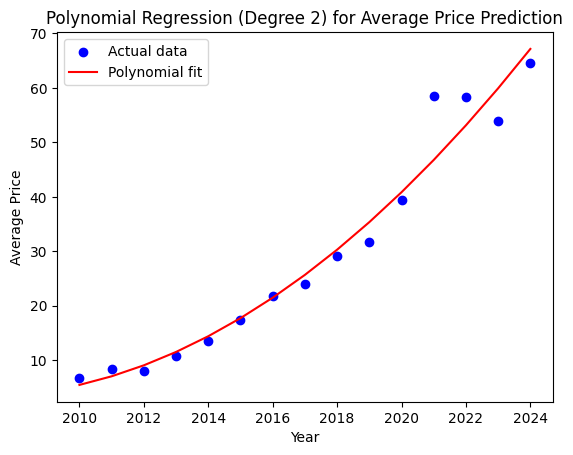

In [59]:
X = yearly_avg_price.index.values.reshape(-1, 1)
y = yearly_avg_price.values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

next_year = np.array([[2025]])
next_year_poly = poly.transform(next_year)
predicted_price = model.predict(next_year_poly)

print(f"Predicted average price for 2025: {predicted_price[0]:.2f}")

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial fit')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Polynomial Regression (Degree 2) for Average Price Prediction')
plt.legend()
plt.show()


In [60]:
y_pred = model.predict(X_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R² score
r2 = r2_score(y, y_pred)

# Predict for the next year
next_year = np.array([[2025]])
next_year_poly = poly.transform(next_year)
predicted_price = model.predict(next_year_poly)

# Output the results
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"Predicted Price for 2025: {predicted_price[0]}")

RMSE: 3.940071091834487
R² Score: 0.960284550037893
Predicted Price for 2025: 74.8135879477486


In [61]:

weekly_avg_close = df['Close'].resample('W').mean()

weekly_avg_close.index = weekly_avg_close.index.to_period('W')

weekly_avg_close_df = pd.DataFrame({
    'Year': weekly_avg_close.index.year,
    'Week': weekly_avg_close.index.week,
    'Average Price': weekly_avg_close.values
})

print(weekly_avg_close_df)


     Year  Week  Average Price
0    2010     1       6.738667
1    2010     2       6.716000
2    2010     3       6.502000
3    2010     4       6.068667
4    2010     5       6.214667
..    ...   ...            ...
772  2024    43      74.486002
773  2024    44      75.003999
774  2024    45      77.081999
775  2024    46      79.096001
776  2024    47      80.394000

[777 rows x 3 columns]


In [62]:
weekly_avg_close.to_csv("weekly_avg_close.csv")

In [63]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [64]:
df=pd.read_csv("weekly_avg_close.csv")


In [65]:
df.columns

Index(['Unnamed: 0', 'Close'], dtype='object')

In [66]:
df.head()

,Unnamed: 0,Close
0,2010-01-04/2010-01-10,6.738667
1,2010-01-11/2010-01-17,6.716000
2,2010-01-18/2010-01-24,6.502000
3,2010-01-25/2010-01-31,6.068667
4,2010-02-01/2010-02-07,6.214667


In [67]:


df['Year'] = pd.to_datetime(df['Unnamed: 0'].str.split('/').str[0]).dt.year
df['Week'] = pd.to_datetime(df['Unnamed: 0'].str.split('/').str[0]).dt.isocalendar().week






In [68]:
df=df[["Year","Week","Close"]]

In [69]:
df.to_csv("weekly_avg_close.csv")

In [70]:
X = df[['Year', 'Week']]
y = df['Close']

In [71]:
df.head()

,Year,Week,Close
0,2010,1,6.738667
1,2010,2,6.716000
2,2010,3,6.502000
3,2010,4,6.068667
4,2010,5,6.214667


In [72]:


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [73]:
X.head()

,Year,Week
0,2010,1
1,2010,2
2,2010,3
3,2010,4
4,2010,5


In [74]:
y.head()

0    6.738667
1    6.716000
2    6.502000
3    6.068667
4    6.214667
Name: Close, dtype: float64

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

y_all_pred = model.predict(X_poly)

df['Predicted_Close'] = y_all_pred

Mean Squared Error: 24.31684895517521
R-squared Score: 0.9424036772578381


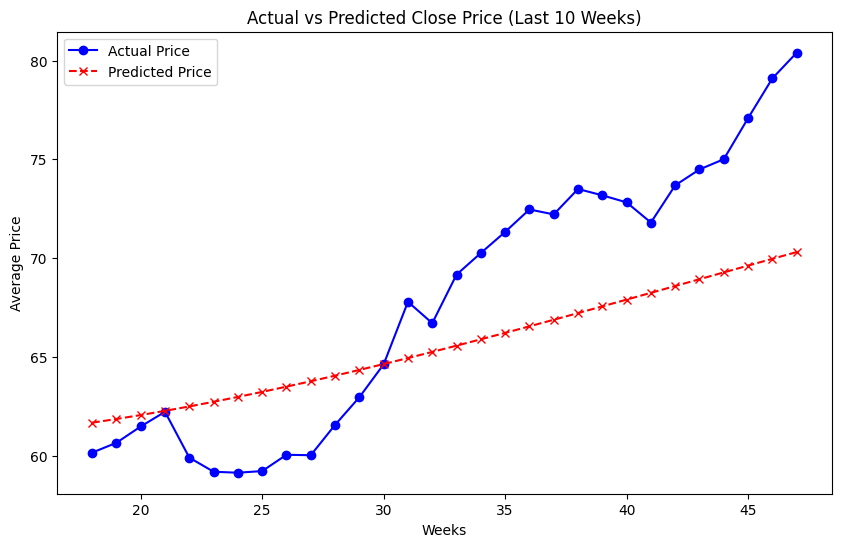

In [76]:
last_subset = df.tail(30)

plt.figure(figsize=(10, 6))

plt.plot(last_subset['Week'], last_subset['Close'], label='Actual Price', marker='o', linestyle='-', color='blue')

plt.plot(last_subset['Week'], last_subset['Predicted_Close'], label='Predicted Price', marker='x', linestyle='--', color='red')

plt.xlabel('Weeks')
plt.ylabel('Average Price')
plt.title('Actual vs Predicted Close Price (Last 10 Weeks)')
plt.legend()

plt.show()


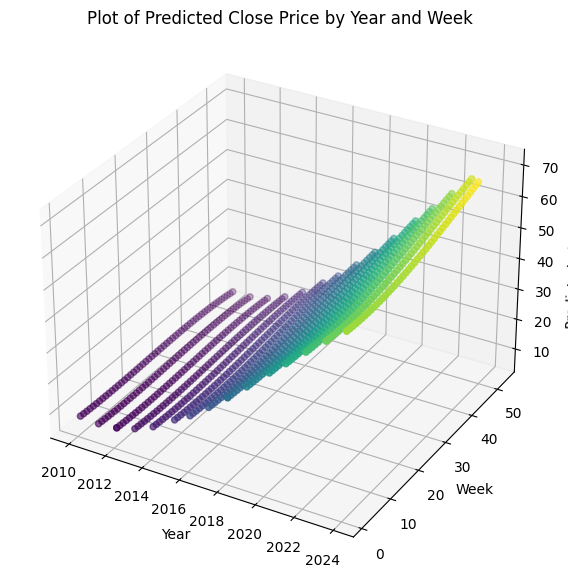

In [77]:
df['Predicted_Close'] = model.predict(X_poly)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['Year']
y = df['Week']
z = df['Predicted_Close']

ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Week')
ax.set_zlabel('Predicted Close Price')

ax.set_title('Plot of Predicted Close Price by Year and Week')

plt.show()

In [78]:
current_gdp_growth = 8.2

In [82]:
df['Actual_Return'] = df['Close'].pct_change() * 100 
df['Predicted_Return'] = df['Predicted_Close'].pct_change() * 100
df = df.dropna()



In [83]:
def investment_recommendation(row, gdp_growth):
    predicted_close = row['Predicted_Close']
    actual_return = row['Actual_Return']
    
    predicted_gdp_impact = predicted_close * (gdp_growth / 100)
    
    strong_threshold = 1.05  # Example: 5% increase over last predicted close price
    weak_threshold = 0.95    # Example: 5% decrease over last predicted close price

    if predicted_gdp_impact > strong_threshold and actual_return > 0:
        return 'Strong'
    elif predicted_gdp_impact < weak_threshold and actual_return < 0:
        return 'Weak'
    elif actual_return == 0:
        return 'Neutral'
    else:
        return 'Neutral'


In [84]:

df['Recommendation'] = df.apply(investment_recommendation, axis=1, gdp_growth=current_gdp_growth)

print("Updated DataFrame with Recommendations:")
print(df)

Updated DataFrame with Recommendations:
     Year  Week      Close  Predicted_Close  Actual_Return  Predicted_Return  \
3    2010     4   6.068667         7.868348      -6.664613         -0.752510   
4    2010     5   6.214667         7.818530       2.405799         -0.633144   
5    2010     6   6.052000         7.778025      -2.617459         -0.518060   
6    2010     7   6.176667         7.746306       2.059919         -0.407806   
7    2010     8   6.191333         7.722844       0.237456         -0.302874   
..    ...   ...        ...              ...            ...               ...   
772  2024    43  74.486002        68.929330       1.091177          0.502920   
773  2024    44  75.003999        69.274212       0.695430          0.500342   
774  2024    45  77.081999        69.618524       2.770519          0.497028   
775  2024    46  79.096001        69.961739       2.612804          0.492993   
776  2024    47  80.394000        70.303327       1.641043          0.488251   
